In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [4]:
train = datasets.MNIST("", train = True, download=False,
                       transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download=False,
                      transform = transforms.Compose([transforms.ToTensor()]))

In [47]:
class_name = test.classes
class_name

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [50]:
len(test), len(train)

(10000, 60000)

In [60]:
img, label = train[0]
img.shape, img.dtype, label, type(label)

(torch.Size([1, 28, 28]), torch.float32, 5, int)

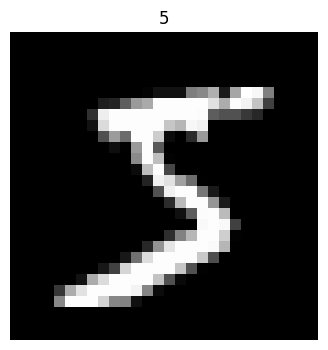

In [61]:
import matplotlib.pyplot as plt
img = img.permute(1,2,0) #-> torch[C,H,W] matplotlib[H,W,C]

plt.figure(figsize=(6,4))
plt.imshow(img, cmap = "gray")
plt.title(label)
plt.axis("off")
plt.show()

In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size = 16, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size = 16, shuffle=True)

In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [93]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),        
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,10)
        )

    def forward(self,x):
        return  self.model(x)


net = Net().to(device)
print(net)
        

Net(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=32, bias=True)
    (6): ReLU()
    (7): Linear(in_features=32, out_features=16, bias=True)
    (8): ReLU()
    (9): Linear(in_features=16, out_features=10, bias=True)
  )
)


In [75]:
for data in trainset:
    x,y = data
    print(y)
    break

tensor([0, 4, 3, 7, 4, 9, 5, 9, 1, 6, 7, 6, 2, 2, 9, 6])


In [76]:
x_o, y_o = data[0][0], data[1][0]
print(y_o)

tensor(0)


In [77]:
x_o = x_o.view(-1,28*28)

In [78]:
x_o.shape

torch.Size([1, 784])

In [81]:
output = net(x_o.to(device))

In [82]:
print(output.argmax(dim=-1))

tensor([6], device='cuda:0')


In [83]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [88]:
next(iter(net.parameters()))

Parameter containing:
tensor([[-0.0170,  0.0315, -0.0189,  ...,  0.0201, -0.0070,  0.0218],
        [-0.0355,  0.0256,  0.0149,  ..., -0.0030, -0.0237,  0.0023],
        [ 0.0158,  0.0213,  0.0111,  ...,  0.0044, -0.0156,  0.0282],
        ...,
        [-0.0103, -0.0204,  0.0313,  ...,  0.0039, -0.0161, -0.0237],
        [-0.0323,  0.0085,  0.0204,  ..., -0.0218, -0.0345, -0.0019],
        [-0.0247,  0.0281,  0.0278,  ..., -0.0037,  0.0212, -0.0122]],
       device='cuda:0', requires_grad=True)

In [90]:
optimizer = torch.optim.SGD(params = net.parameters(),
                           lr = 0.1)
loss = nn.CrossEntropyLoss()

In [97]:
epochs = 5

for epoch in range(epochs):
    train_loss, test_loss = 0 , 0
    net.train()
    for batch in trainset:
        X,y = batch
        X,y = X.to(device), y.to(device)

        # Forward pass
        y_hat = net(X)

        # Loss compute
        batch_loss = loss(y_hat,y)
        train_loss += batch_loss

        optimizer.zero_grad()
        
        # loss backward
        batch_loss.backward()

        # optimizer step
        optimizer.step()

    train_loss /= len(trainset)
    print(f"epoch - {epoch} : training loss - {train_loss:.4f}")

    net.eval()

    for X,y in testset:
        X,y = X.to(device), y.to(device)
        with torch.inference_mode():
            y_pred = net(X)
        test_loss += loss(y_pred,y)
    test_loss /= len(testset)
    print(f"epoch - {epoch} : test loss - {test_loss:.4f}")
       

    

epoch - 0 : training loss - 2.3077
epoch - 0 : test loss - 2.3084
epoch - 1 : training loss - 2.3077
epoch - 1 : test loss - 2.3084
epoch - 2 : training loss - 2.3077
epoch - 2 : test loss - 2.3084
epoch - 3 : training loss - 2.3077
epoch - 3 : test loss - 2.3084
epoch - 4 : training loss - 2.3077
epoch - 4 : test loss - 2.3084


In [142]:
img, label = next(iter(trainset))
img.shape, label

(torch.Size([16, 1, 28, 28]),
 tensor([3, 3, 8, 9, 6, 4, 9, 1, 4, 2, 8, 6, 8, 6, 6, 8]))

In [143]:
image = img[0]
label = label[0]

print(label)



tensor(3)


In [144]:
image.shape

torch.Size([1, 28, 28])

In [145]:
image = image.to(device)
image_pred = net(image)
image_pred

tensor([[-0.1096,  0.1162, -0.1767, -0.1186, -0.1911,  0.0252, -0.0679,  0.1751,
          0.1341, -0.0656]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [146]:
image_pred.argmax()

tensor(7, device='cuda:0')